# About Dataset
This is a synthetic dataset created using actual data from a financial institution. The data has been modified to remove identifiable features and the numbers transformed to ensure they do not link to original source (financial institution).

This is intended to be used for academic purposes for beginners who want to practice financial analytics from a simple financial dataset

In [3]:
# **DATA PROCESSING**

import numpy as np 
import pandas as pd

# **DATA ANALYSIS**

import matplotlib.pyplot as plt
import seaborn as sns

# **PRE PROCESSING**

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer

# **MACHINE LEARNING MODELS**

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# **NEURAL NETWORKS**

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# **METRICS**

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report


Lets import our main data into the notebook

In [5]:
data = pd.read_csv("Default_Fin.csv")

It is a good habit to take a look at the data first. It gives us a lot of knowledge

In [6]:
data

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0
...,...,...,...,...,...
9995,9996,1,8538.72,635908.56,0
9996,9997,1,9095.52,235928.64,0
9997,9998,1,10144.92,703633.92,0
9998,9999,1,18828.12,440029.32,0


The data have  $10000$rows and  $5$ columns accounting to  $50,000$  values in total. `Id` column seems to be unique/primary key for every feature, so lets just remove it 

In [7]:
data.drop("Index" , axis = 1 , inplace = True)

And now our data looks better

In [8]:
data

,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,8754.36,532339.56,0
1,0,9806.16,145273.56,0
2,1,12882.60,381205.68,0
3,1,6351.00,428453.88,0
4,1,9427.92,461562.00,0
...,...,...,...,...
9995,1,8538.72,635908.56,0
9996,1,9095.52,235928.64,0
9997,1,10144.92,703633.92,0
9998,1,18828.12,440029.32,0


Lets plot some graphs now 

<Axes: xlabel='Bank Balance', ylabel='Density'>

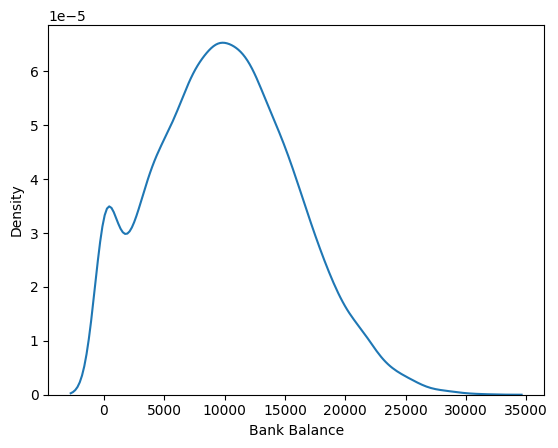

In [9]:
sns.kdeplot(data["Bank Balance"])

<Axes: xlabel='Annual Salary', ylabel='Density'>

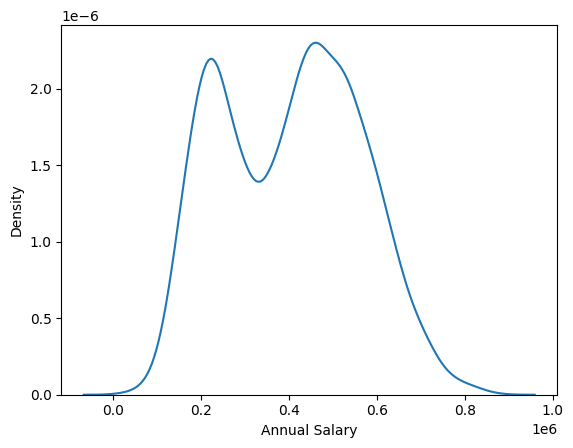

In [10]:
sns.kdeplot(data["Annual Salary"])

<Axes: ylabel='Employed'>

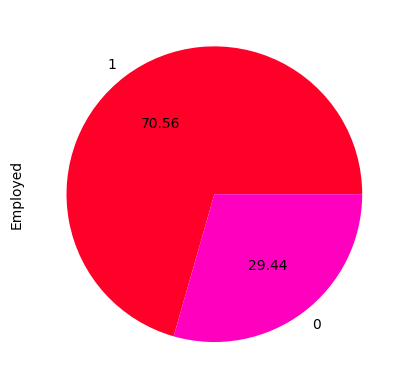

In [11]:
data["Employed"].value_counts().plot(kind = "pie" , autopct = "%.2f" , cmap = "gist_rainbow")

<Axes: ylabel='Defaulted?'>

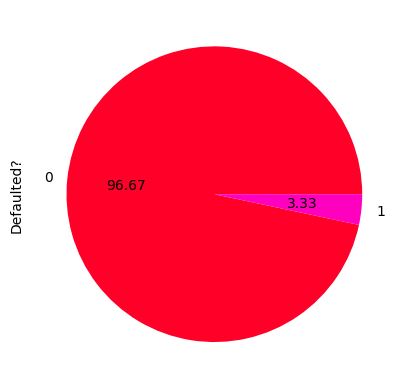

In [12]:
data["Defaulted?"].value_counts().plot(kind = "pie" , autopct = "%.2f" , cmap = "gist_rainbow")

<Axes: xlabel='Bank Balance', ylabel='Annual Salary'>

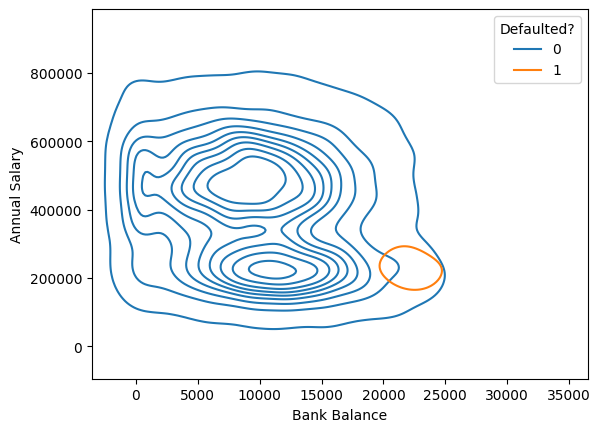

In [13]:
sns.kdeplot(data = data , x = "Bank Balance" , y = "Annual Salary" , hue = "Defaulted?")

Lets divide our data into train , test 

In [14]:
train , test = np.split(data.sample(frac = 1) , [int(0.8* len(data))])

In [15]:
def pre(dataframe):
    y = dataframe["Defaulted?"]
    
    x = pd.DataFrame(StandardScaler().fit_transform(dataframe.drop("Defaulted?" , axis = 1)))
    
    return x , y

In [16]:
X_train , Y_train = pre(train)
X_test , Y_test = pre(test)

Our first model is [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [17]:
model_0 = KNeighborsClassifier()
model_0.fit(X_train , Y_train)

KNeighborsClassifier()

And the second one will be [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [18]:
model_1 = LogisticRegression()
model_1.fit(X_train , Y_train)

LogisticRegression()

The third one will be [GaussianNB](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)

In [19]:
model_2 = GaussianNB()
model_2.fit(X_train , Y_train)

GaussianNB()

the fourth one will be [DecisionTreeClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [20]:
model_3 = DecisionTreeClassifier()
model_3.fit(X_train , Y_train)

DecisionTreeClassifier()

The fifth one will be [RandomForestClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [21]:
model_4 = RandomForestClassifier()
model_4.fit(X_train , Y_train)

RandomForestClassifier()

Now we will predict the accuracy of our models

In [23]:
print("Accracy of " , model_0 , "is" , accuracy_score(Y_test , model_0.predict(X_test)))
print("Accracy of " , model_1 , "is" , accuracy_score(Y_test , model_1.predict(X_test)))
print("Accracy of " , model_2 , "is" , accuracy_score(Y_test , model_2.predict(X_test)))
print("Accracy of " , model_3 , "is" , accuracy_score(Y_test , model_3.predict(X_test)))
print("Accracy of " , model_4 , "is" , accuracy_score(Y_test , model_4.predict(X_test)))


Accracy of  KNeighborsClassifier() is 0.966
Accracy of  LogisticRegression() is 0.9685
Accracy of  GaussianNB() is 0.9675
Accracy of  DecisionTreeClassifier() is 0.9565
Accracy of  RandomForestClassifier() is 0.9685


Now we will be training some neural networks

In [28]:
model = Sequential()
model.add(Dense(64 , activation = "relu" , input_dim = 3))
model.add(Dense(128 , activation = "relu" ))
model.add(Dense(128 , activation = "relu" ))
model.add(Dense(256 , activation = "relu"))
model.add(Dense(3 , activation = "relu"))
model.add(Dense(1 , activation = "relu"))

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                256       
                                                                 
 dense_7 (Dense)             (None, 128)               8320      
                                                                 
 dense_8 (Dense)             (None, 128)               16512     
                                                                 
 dense_9 (Dense)             (None, 256)               33024     
                                                                 
 dense_10 (Dense)            (None, 3)                 771       
                                                                 
 dense_11 (Dense)            (None, 1)                 4         
                                                                 
Total params: 58,887
Trainable params: 58,887
Non-trai

In [30]:
model.compile(loss = "binary_crossentropy" , optimizer = "adam" , metrics = ["accuracy"])

In [31]:
sample_fit = model.fit(X_train , Y_train , epochs = 50 , validation_split = 0.2)

Epoch 1/50
200/200 [==============================] - 2s 7ms/step - loss: 0.1900 - accuracy: 0.9631 - val_loss: 0.1391 - val_accuracy: 0.9656
Epoch 2/50
200/200 [==============================] - 1s 5ms/step - loss: 0.1272 - accuracy: 0.9698 - val_loss: 0.1640 - val_accuracy: 0.9712
Epoch 3/50
200/200 [==============================] - 1s 4ms/step - loss: 0.1720 - accuracy: 0.9588 - val_loss: 0.1868 - val_accuracy: 0.9431
Epoch 4/50
200/200 [==============================] - 1s 5ms/step - loss: 0.5075 - accuracy: 0.9667 - val_loss: 0.4338 - val_accuracy: 0.9719
Epoch 5/50
200/200 [==============================] - 1s 4ms/step - loss: 0.5085 - accuracy: 0.9670 - val_loss: 0.4338 - val_accuracy: 0.9719
Epoch 6/50
200/200 [==============================] - 1s 5ms/step - loss: 0.5085 - accuracy: 0.9670 - val_loss: 0.4338 - val_accuracy: 0.9719
Epoch 7/50
200/200 [==============================] - 1s 5ms/step - loss: 0.5085 - accuracy: 0.9670 - val_loss: 0.4338 - val_accuracy: 0.9719
Epoch 

In [33]:
y_log = model.predict(X_test)
y_pred = np.where(y_log > 0 , 1 , 0)
print(accuracy_score(Y_test , y_pred))

63/63 [==============================] - 1s 4ms/step
0.9615


We got a really good accuracy with $96.85$% percentage in Random forests